# Notebook D: Analysis of NADPH and Acetyl-CoA sources and sinks
This Jupyter notebook is centered around the analysis of key metabolic intermediates, NADPH and Acetyl-CoA, in Yarrowia lipolytica when metabolizing different substrates like glucose, glycerol, and oleic acid. The focus is on identifying and quantifying the major sources and sinks of these intermediates within the cellular metabolism, utilizing the genome-scale metabolic model (GSM) of Y. lipolytica.

### Objective
The primary goal of this analysis is to elucidate the metabolic pathways contributing to the synthesis and consumption of NADPH and Acetyl-CoA. This understanding is vital for metabolic engineering efforts aimed at optimizing the production of bio-based chemicals and fuels in Y. lipolytica.

### Key Functions
`get_sources_and_sinks`: Identifies the reactions acting as sources and sinks for a specified metabolite within the metabolic network. This function is crucial for mapping the metabolic flux of NADPH and Acetyl-CoA in different conditions.


### Load imports

In [1]:
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import sys

source_dir = '../src'
sys.path.append(source_dir)

from plot_rxn_gsm_bounds_grid import plot_rxn_gsm_bounds_grid
from create_side_by_side_histograms import create_side_by_side_histograms

### Load the genome scale model

In [2]:
model = cobra.io.json.load_json_model('../genome_scale_models/iYLI647_corr_3.json')

### Keep reaction ids consistent

In [3]:
model.reactions.get_by_id('EX_glc(e)').id  = 'EX_glc_e'
model.reactions.get_by_id('EX_glyc(e)').id = 'EX_glyc_e'
model.reactions.get_by_id('EX_ocdcea(e)').id = 'EX_ocdcea_e'
model.reactions.get_by_id('EX_h2o(e)').id = 'EX_h2o_e'
model.reactions.get_by_id('EX_h(e)').id = 'EX_h_e'
model.reactions.get_by_id('EX_nh4(e)').id = 'EX_nh4_e'
model.reactions.get_by_id('EX_o2(e)').id = 'EX_o2_e'
model.reactions.get_by_id('EX_pi(e)').id = 'EX_pi_e'
model.reactions.get_by_id('EX_so4(e)').id = 'EX_so4_e'

# print an example reaction
model.reactions.get_by_id('EX_glc_e')

Reaction identifier,EX_glc_e
Name,D Glucose exchange
Memory address,0x2a224f730
Stoichiometry,glc_D[e] <=> D_Glucose <=>
GPR,YALI0D01111g or YALI0D18876g or YALI0D00132g or YALI0B01342g or YALI0E23287g or YALI0B00396g or...
Lower bound,-10.0
Upper bound,1000.0


### Load Central Flux Data

In [4]:
# open biomass cutoff data and 13C-MFA bound data
biomass_cutoff_gsm_central_df = pd.read_csv('../results/central_fluxes/mfa_bounds_from_gsm_01192024.csv')
mfa_constrainted_gsm_central_df = pd.read_csv('../results/central_fluxes/mfa_constrained_gsm_central_bounds_01212024.csv')

display(biomass_cutoff_gsm_central_df.head())
display(mfa_constrainted_gsm_central_df.head())

,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Oleic Acid MFA UB,Glucose GSM LB,Glucose GSM UB,Glucose_mfa_bound_feasibility,Glycerol GSM LB,Glycerol GSM UB,Glycerol_mfa_bound_feasibility,Oleic Acid GSM LB,Oleic Acid GSM UB,Oleic Acid_mfa_bound_feasibility
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.0000,100.0000,NaN,...,NaN,100.000000,100.000000,fully feasible,0.000000,-0.000000,NaN,0.000000,-0.000000,NaN
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,NaN,-26.574563,-0.000000,NaN,100.000000,100.000000,fully feasible,-67.583966,-0.000000,NaN
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,100.0000,0.000000,-0.000000,NaN,0.000000,-0.000000,NaN,100.000000,100.000000,fully feasible
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0496,9.7776,23.5421,-41.3947,...,-265.6116,-190.412199,92.008809,fully feasible,-96.832349,-3.061031,fully feasible,-549.764335,-24.440384,fully feasible


,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Glycerol MFA UB,Oleic Acid MFA Flux,Oleic Acid MFA LB,Oleic Acid MFA UB,Glucose MFA-Constrained GSM LB,Glucose MFA-Constrained GSM UB,Glycerol MFA-Constrained GSM LB,Glycerol MFA-Constrained GSM UB,Oleic Acid MFA-Constrained GSM LB,Oleic Acid MFA-Constrained GSM UB
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.000,100.0000,NaN,...,NaN,NaN,NaN,NaN,100.00000,100.0000,0.000000,-0.000000,0.000000,-0.000
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,100.0000,NaN,NaN,NaN,-6.27350,-0.0000,100.000000,100.000000,-0.063537,-0.000
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,100.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,NaN,100.0000,100.0000,100.000,0.00000,-0.0000,0.000000,-0.000000,100.000000,100.000
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0175,9.792,23.5403,-41.3947,...,-36.5906,-305.8491,-319.0201,-256.517,21.59084,23.5403,-36.776517,-31.998287,-257.125896,-256.517


In [5]:
central_rxn_df = mfa_constrainted_gsm_central_df.copy()

# add columns from biomass_cutoff_gsm_central_df to mfa_constrainted_gsm_central_df
central_rxn_df['Glucose Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Glucose GSM LB']
central_rxn_df['Glucose Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Glucose GSM UB']

central_rxn_df['Glycerol Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Glycerol GSM LB']
central_rxn_df['Glycerol Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Glycerol GSM UB']

central_rxn_df['Oleic Acid Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Oleic Acid GSM LB']
central_rxn_df['Oleic Acid Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Oleic Acid GSM UB']

central_rxn_df.head()

,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Glycerol MFA-Constrained GSM LB,Glycerol MFA-Constrained GSM UB,Oleic Acid MFA-Constrained GSM LB,Oleic Acid MFA-Constrained GSM UB,Glucose Biomass Cutoff GSM LB,Glucose Biomass Cutoff GSM UB,Glycerol Biomass Cutoff GSM LB,Glycerol Biomass Cutoff GSM UB,Oleic Acid Biomass Cutoff GSM LB,Oleic Acid Biomass Cutoff GSM UB
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.000,100.0000,NaN,...,0.000000,-0.000000,0.000000,-0.000,100.000000,100.000000,0.000000,-0.000000,0.000000,-0.000000
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,100.000000,100.000000,-0.063537,-0.000,-26.574563,-0.000000,100.000000,100.000000,-67.583966,-0.000000
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,0.000000,-0.000000,100.000000,100.000,0.000000,-0.000000,0.000000,-0.000000,100.000000,100.000000
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0175,9.792,23.5403,-41.3947,...,-36.776517,-31.998287,-257.125896,-256.517,-190.412199,92.008809,-96.832349,-3.061031,-549.764335,-24.440384


### Plot Glucose GSM and MFA flux bounds 

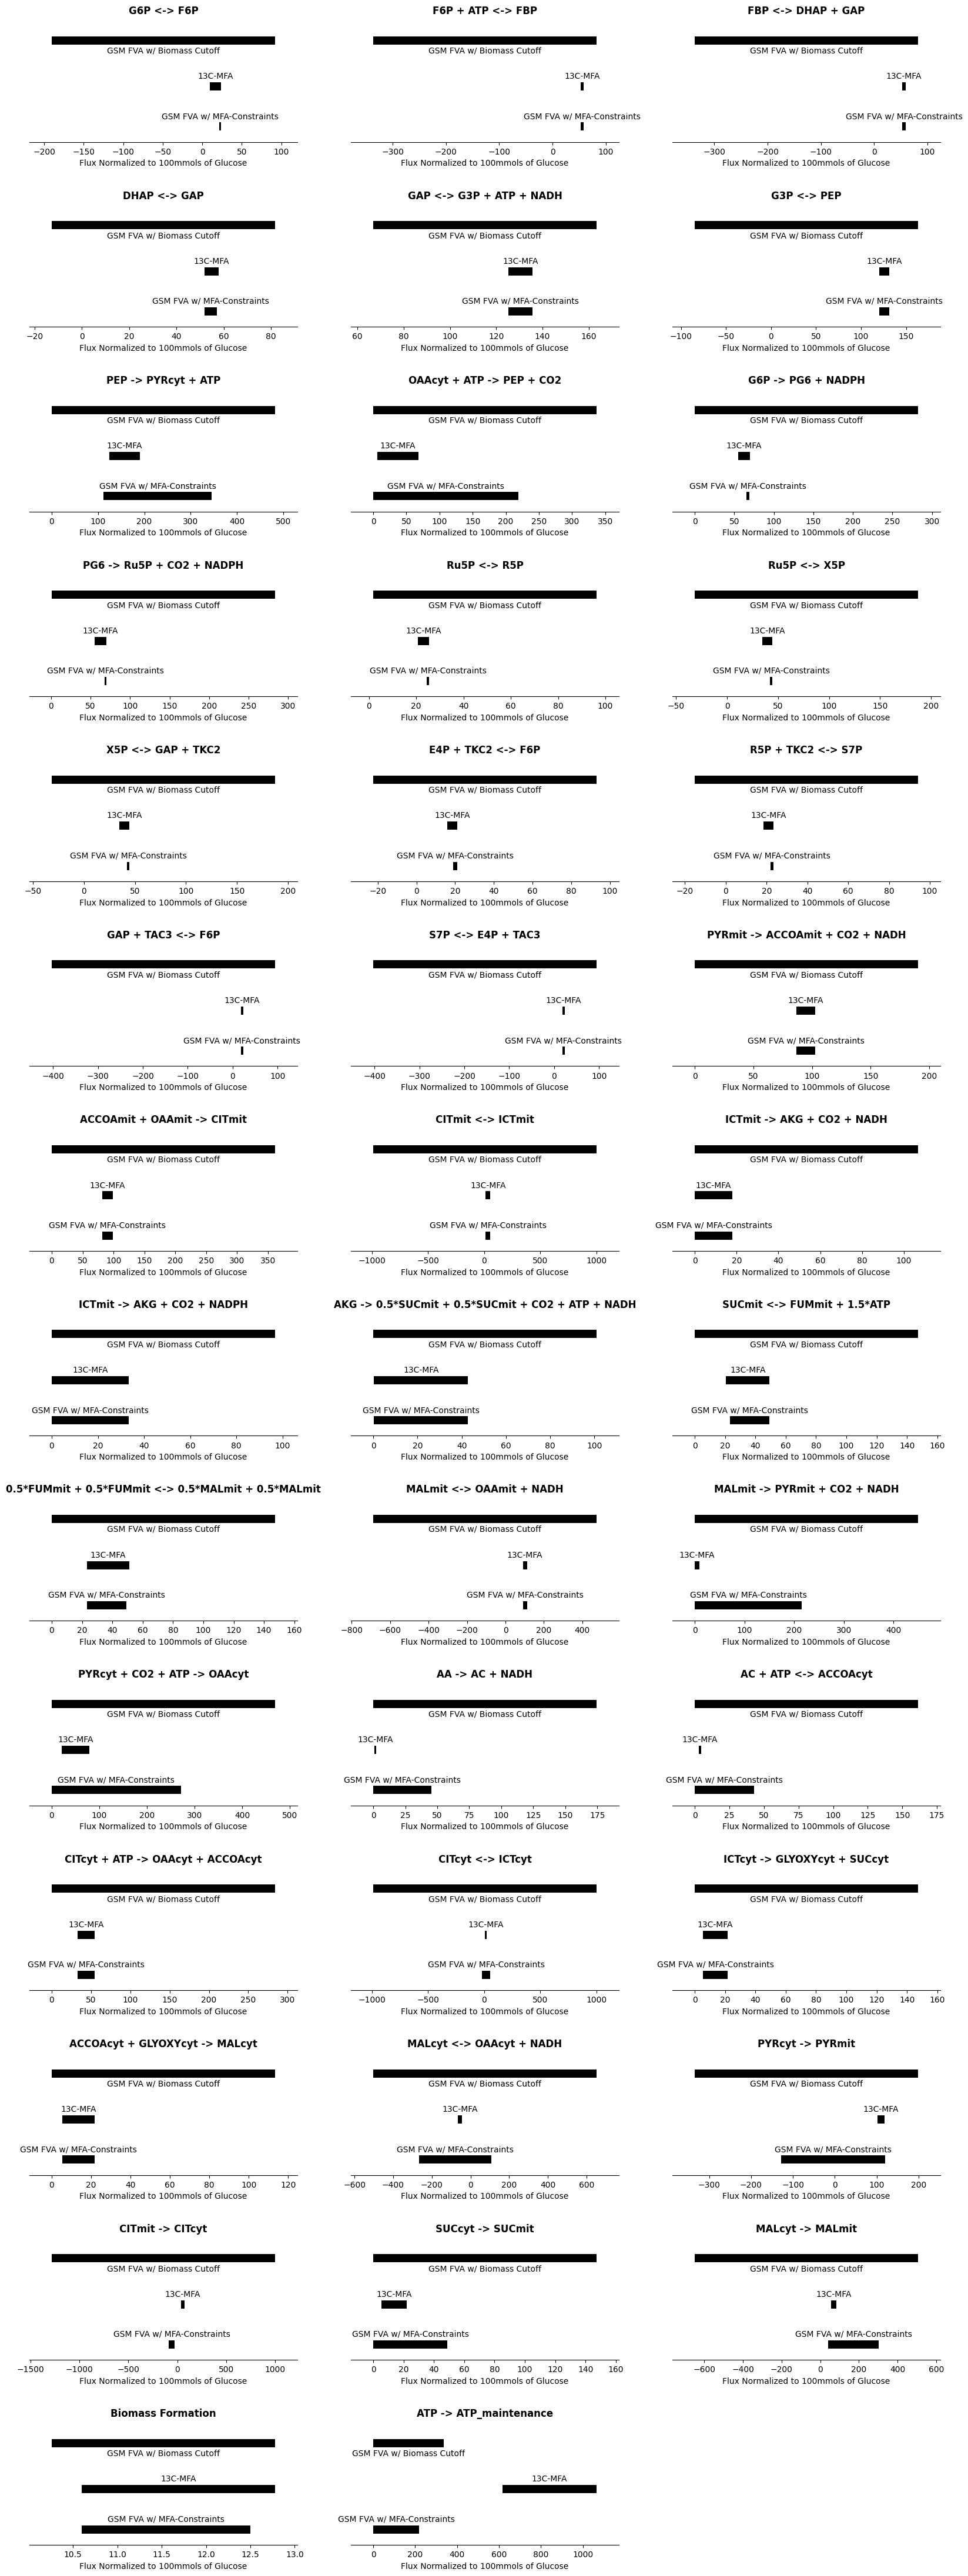

In [6]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Glucose')

### Plot Glycerol GSM and MFA flux bounds 

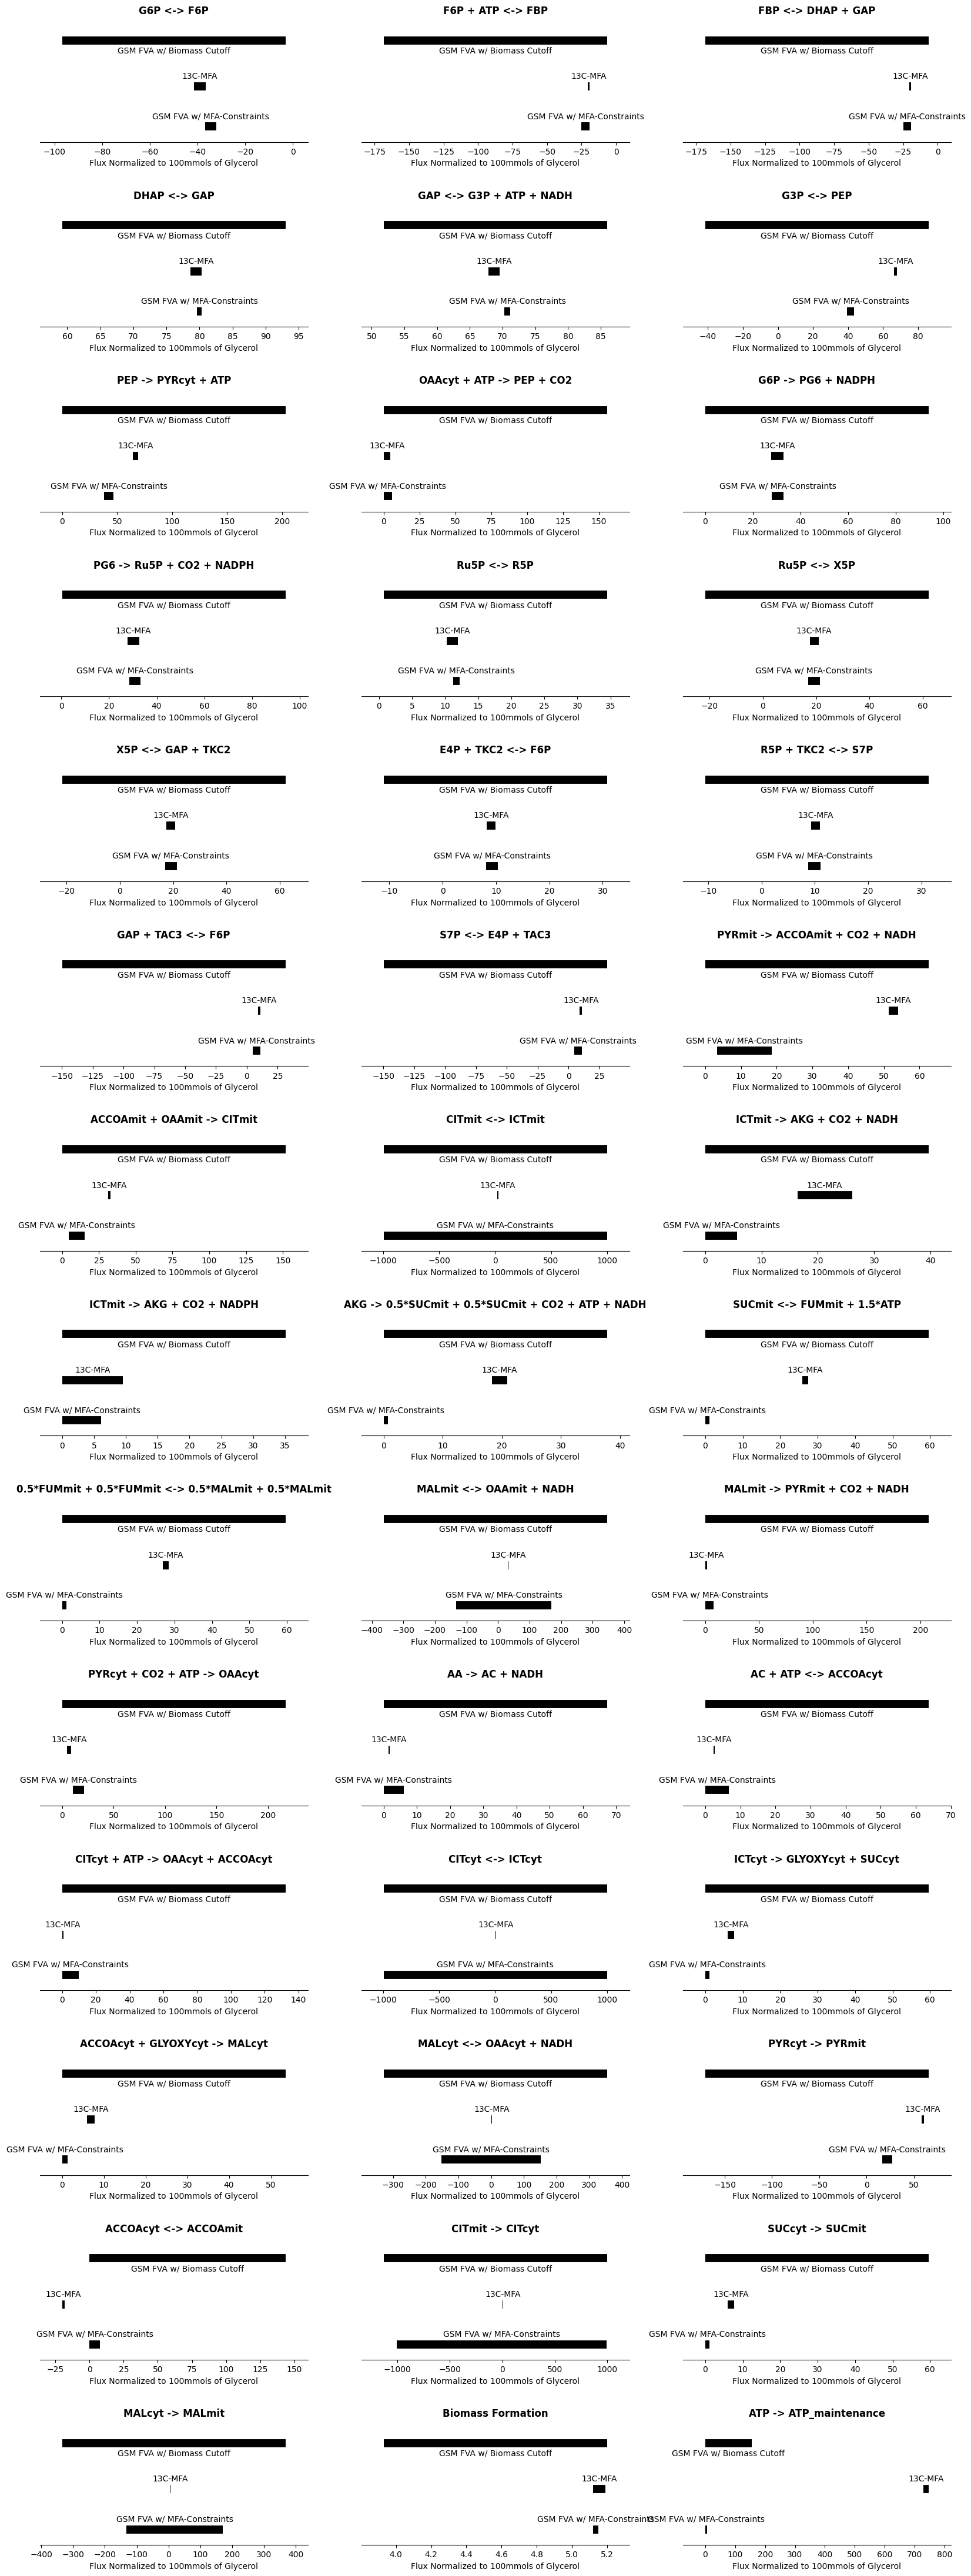

In [7]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Glycerol')

### Plot Oleic Acid GSM and MFA flux bounds 

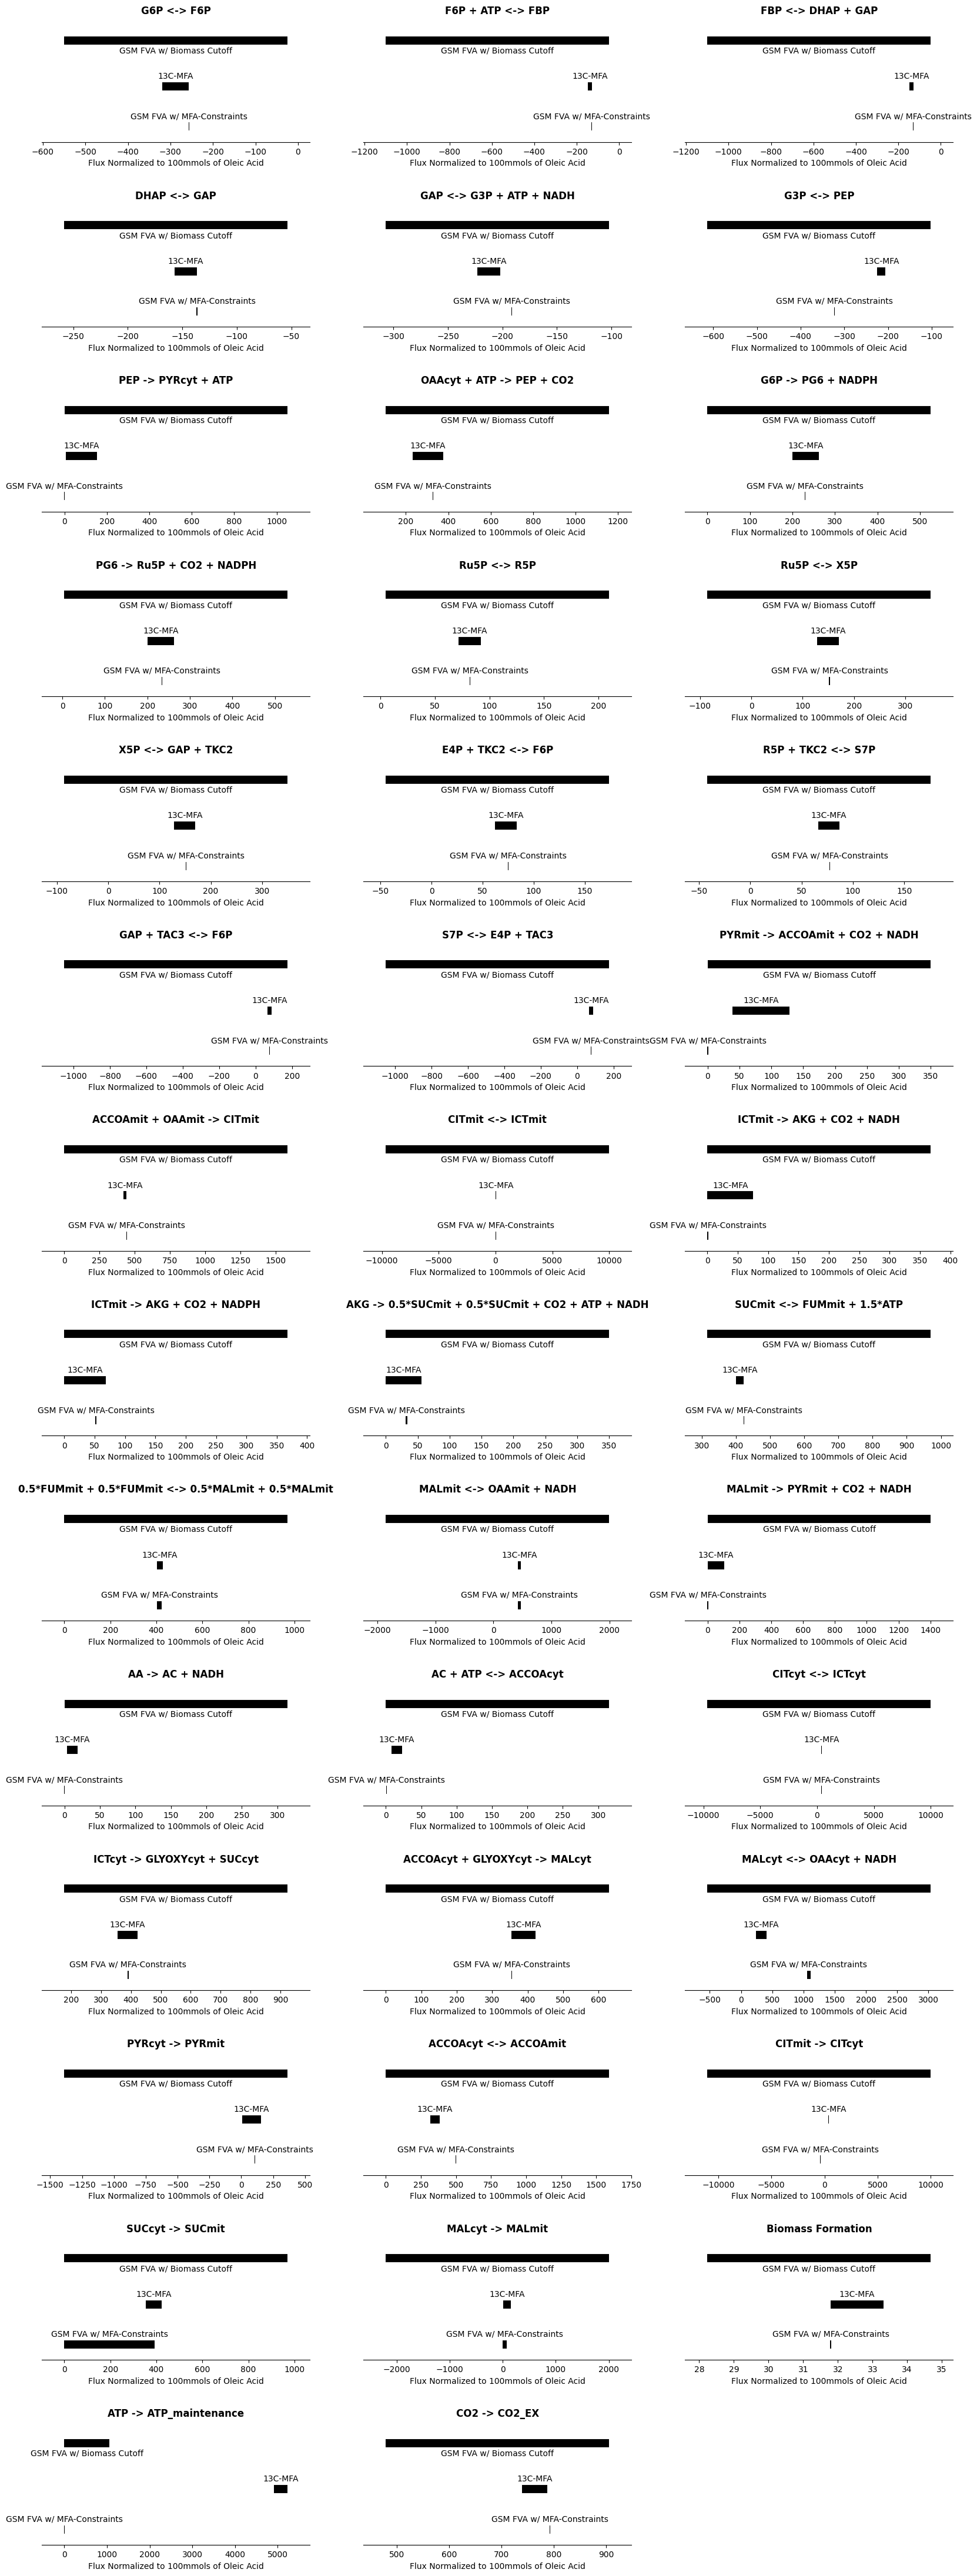

In [8]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Oleic Acid')

## Plot GSM Bound Histograms

In [9]:
# load biomass bound gsm fluxes
glucose_biomass_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/glucose_biomass_bound_gsm_fluxes.csv')
glycerol_biomass_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/glycerol_biomass_bound_gsm_fluxes.csv')
oleic_acid_biomass_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/oleic_acid_biomass_bound_gsm_fluxes.csv')

# load mfa bound gsm fluxes
glucose_mfa_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/glucose_mfa_bound_gsm_fluxes.csv')
glycerol_mfa_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/glycerol_mfa_bound_gsm_fluxes.csv')
oleic_acid_mfa_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/oleic_acid_mfa_bound_gsm_fluxes.csv')

oleic_acid_biomass_bound_gsm_df


,reaction_id,reaction_name,full_reaction,Oleic Acid Biomass-Constrained GSM flux,Oleic Acid Biomass-Constrained GSM LB,Oleic Acid Biomass-Constrained GSM UB
0,13BGH,Endo 1 3 beta glucan glucohydrase,13BDglcn[c] + h2o[c] --> glc_D[c],0.000000,0.000000,525.947962
1,13BGHe,Exo 1 3 beta glucan glucohydrase,13BDglcn[e] + h2o[e] --> glc_D[e],0.000000,0.000000,-0.000000
2,ASADi,aspartate semialdehyde dehydrogenase irreversible,4pasp[c] + h[c] + nadph[c] --> aspsa[c] + nadp...,6.819378,5.552455,231.425183
3,2DDA7Ptm,2 Dehydro 3 deoxy D arabino heptonate7 phohsph...,2dda7p[c] <=> 2dda7p[m],0.000000,-67.049936,-0.000000
4,2DHPtm,2 Dehydropantoate mitochondrial transport,2dhp[c] <=> 2dhp[m],0.000000,0.000000,27.426414
...,...,...,...,...,...,...
1346,EX_eryth(e),EX_eryth(e),erythritol[e] -->,0.000000,0.000000,63.578990
1347,EX_biom,EX_biom,biomass[c] -->,34.681573,28.238335,34.681573
1348,MALS,Malate synthase,accoa[c] + glx[c] + h2o[c] --> coa[c] + h[c] +...,195.747428,0.000000,629.652230
1349,biomass_glucose,NaN,0.6822317267700153 13BDglcn[c] + 0.55472655920...,0.000000,0.000000,-0.000000


In [10]:
glucose_biomass_bound_sizes = [row['Glucose Biomass-Constrained GSM UB'] - row['Glucose Biomass-Constrained GSM LB'] for _, row in glucose_biomass_bound_gsm_df.iterrows()]
glycerol_biomass_bound_sizes = [row['Glycerol Biomass-Constrained GSM UB'] - row['Glycerol Biomass-Constrained GSM LB'] for _, row in glycerol_biomass_bound_gsm_df.iterrows()]
oleic_acid_biomass_bound_sizes = [row['Oleic Acid Biomass-Constrained GSM UB'] - row['Oleic Acid Biomass-Constrained GSM LB'] for _, row in oleic_acid_biomass_bound_gsm_df.iterrows()]

glucose_mfa_bound_sizes = [row['Glucose MFA-Constrained GSM UB'] - row['Glucose MFA-Constrained GSM LB'] for _, row in glucose_mfa_bound_gsm_df.iterrows()]
glycerol_mfa_bound_sizes = [row['Glycerol MFA-Constrained GSM UB'] - row['Glycerol MFA-Constrained GSM LB'] for _, row in glycerol_mfa_bound_gsm_df.iterrows()]
oleic_acid_mfa_bound_sizes = [row['Oleic Acid MFA-Constrained GSM UB'] - row['Oleic Acid MFA-Constrained GSM LB'] for _, row in oleic_acid_mfa_bound_gsm_df.iterrows()]

# glucose_mfa_bound_sizes

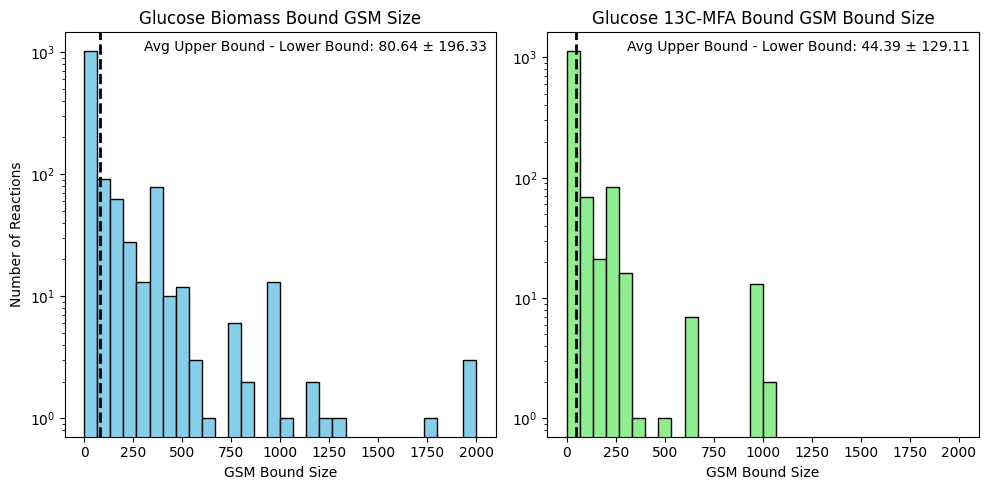

In [11]:
create_side_by_side_histograms(glucose_biomass_bound_sizes, glucose_mfa_bound_sizes , 'Glucose Biomass Bound GSM Size', 'Glucose 13C-MFA Bound GSM Bound Size')

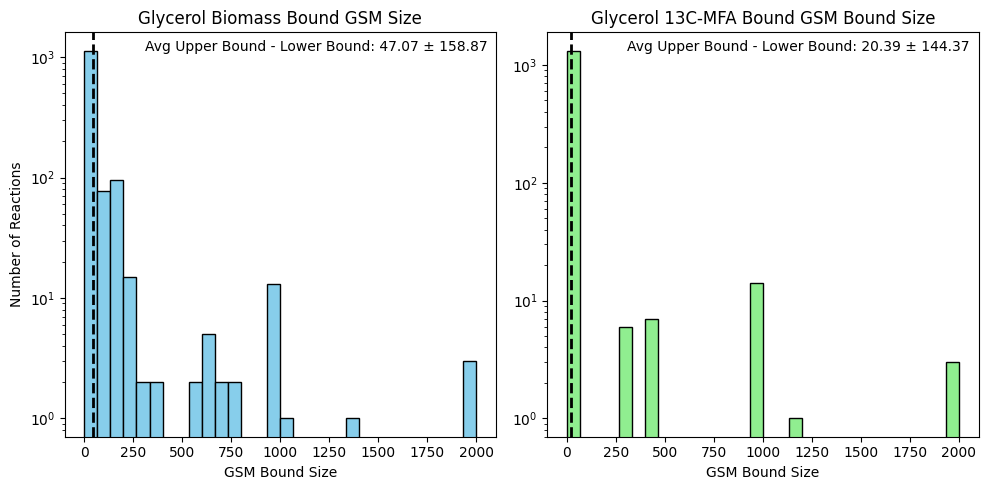

In [12]:
create_side_by_side_histograms(glycerol_biomass_bound_sizes, glycerol_mfa_bound_sizes , 'Glycerol Biomass Bound GSM Size', 'Glycerol 13C-MFA Bound GSM Bound Size')

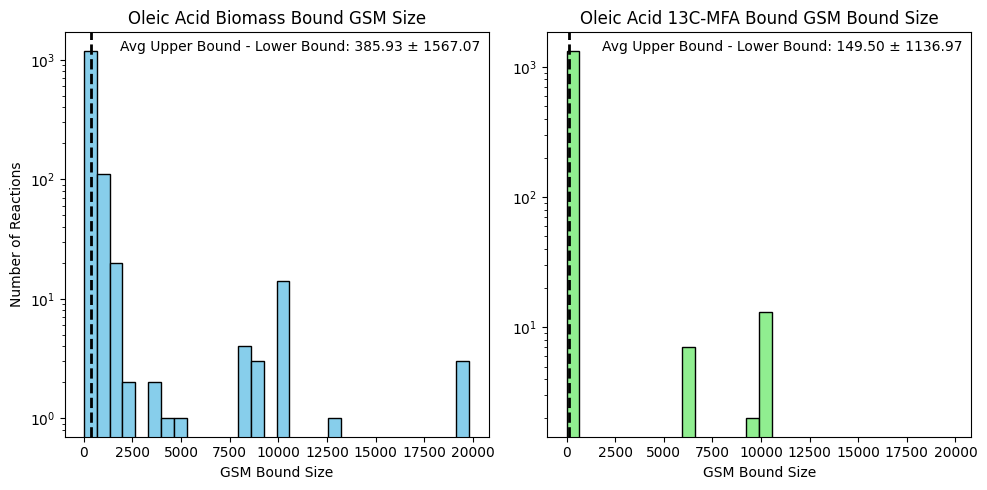

In [13]:
create_side_by_side_histograms(oleic_acid_biomass_bound_sizes, oleic_acid_mfa_bound_sizes , 'Oleic Acid Biomass Bound GSM Size', 'Oleic Acid 13C-MFA Bound GSM Bound Size')

## Plot sources and sinks figure

### Load GSM data files

In [ ]:
# load results/gsm_fluxes/glucose_gsm_fluxes.csv
glucose_gsm_fluxes_df = pd.read_csv('../results/gsm_fluxes/glucose_gsm_fluxes.csv')
glycerol_gsm_fluxes_df = pd.read_csv('../results/gsm_fluxes/glycerol_gsm_fluxes.csv')
oleic_acid_gsm_fluxes_df = pd.read_csv('../results/gsm_fluxes/oleic_acid_gsm_fluxes.csv')

oleic_acid_gsm_fluxes_df

### Determine all NADPH reactions

In [ ]:
nadph_rxns = [r for r in model.reactions if 'nadph[c]' in r.reaction]

print(f'There are {len(nadph_rxns)} reactions that produce or consume NADPH')

# make a dataframe of the NADPH producing/consuming reactions
rxn_data = []

for rxn in nadph_rxns:
    rxn_data.append({'Reaction': rxn.id, 'Name': rxn.name, 'Equation': rxn.reaction})

rxn_df = pd.DataFrame(rxn_data)

# save the csv to ../results/cofactor_reaction/nadph_rxns.csv
rxn_df.to_csv('../results/cofactor_reactions/nadph_rxns.csv', index=False)



### Make Hisgrams of GSM reaction bound size

### Load pFBA and E-Flux2 Data

In [ ]:
glucose_df = pd.read_csv('../results/gsm_fluxes/glucose_gsm_fluxes.csv')
glycerol_df = pd.read_csv('../results/gsm_fluxes/glycerol_gsm_fluxes.csv')
oleic_acid_df = pd.read_csv('../results/gsm_fluxes/oleic_acid_gsm_fluxes.csv')
glucose_df

### 

### Define a function to get the sources and sinks of a given metabolite 

In [ ]:
# Define a function to get the sources and sinks of a given metabolite 
def get_sources_and_sinks(df, column_name, metabolite_id):
    metabolite = model.metabolites.get_by_id(metabolite_id)

    # make empty source and sink dataframes
    sources = []
    sinks = []

    # loop over rows of the dataframe
    for _, row in df.iterrows():
        reaction_id = row['reaction_id']
        reaction = model.reactions.get_by_id(reaction_id)
        flux = row[column_name]

        # check if the metabolite is in the reaction
        if metabolite not in reaction.metabolites:
            continue
        else:
            metabolite_coefficient = reaction.metabolites[metabolite]
            if flux * metabolite_coefficient > 0:
                sources.append({
                    'reaction_id': reaction_id,
                    'reaction_name': reaction.name,
                    'full_reaction': reaction.reaction,
                    'metabolite_coefficient': metabolite_coefficient,
                    'flux': flux,
                    'total_flux': flux * metabolite_coefficient,
                })
            else:
                sinks.append({
                    'reaction_id': reaction_id,
                    'reaction_name': reaction.name,
                    'full_reaction': reaction.reaction,
                    'metabolite_coefficient': metabolite_coefficient,
                    'flux': flux,
                    'total_flux': flux * metabolite_coefficient,
                })

    source_df = pd.DataFrame(sources)
    sink_df = pd.DataFrame(sinks)

    # sort the dataframes by absolute value of total flux
    source_df = source_df.assign(abs_total_flux=source_df.total_flux.abs())
    source_df = source_df.sort_values('abs_total_flux', ascending=False)

    sink_df = sink_df.assign(abs_total_flux=sink_df.total_flux.abs())
    sink_df = sink_df.sort_values('abs_total_flux', ascending=False)
    
    return source_df, sink_df

sources, sinks = get_sources_and_sinks(glucose_df, 'glucose_pfba_flux', 'nadph[c]')

print('sources')
display(sources)
print('sinks')
display(sinks)

In [ ]:
sources, sinks = get_sources_and_sinks(glucose_df, 'glucose_pfba_flux', 'nadph[m]')

print('sources')
display(sources)
print('sinks')
display(sinks)

### Look at oleic acid NADPH sources and sinks

In [ ]:
sources, sinks = get_sources_and_sinks(oleic_acid_df, 'oleic_acid_pfba_flux', 'nadph[c]')

print('sources')
display(sources)
print('sinks')
display(sinks)

In [ ]:
sources, sinks = get_sources_and_sinks(oleic_acid_df, 'oleic_acid_pfba_flux', 'nadph[m]')

print('sources')
display(sources)
print('sinks')
display(sinks)

In [ ]:
# get sum of absolute values of fluxes for both dfs
sources_sum = sources['total_flux'].abs().sum()
sinks_sum = sinks['total_flux'].abs().sum()

# print the sum of fluxes
print('sources sum: ', sources_sum)
print('sinks sum: ', sinks_sum)

In [ ]:
len(sources)